In [11]:
import tarfile,os
import sys
import gzip
from xml.etree import ElementTree as ET

#os.chdir("/opt/nltk_data/nyt/data/1987")
#tar = tarfile.open("01.tgz")
#for member in [x for x in tar.getmembers()[:3] if str(x).find(".xml")>-1]:
#    print(member)
#    with tar.extractfile(member) as f:        
#        with f.readlines() as xml:
#            doc = ET.parse(xml).getroot()
#            print(doc.find('title').text)
#tar.close()

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

def plotFreqDistAsBarChart(fdist,n):
    words = [x[0] for x in fdist.most_common(n)]
    values = [x[1] for x in fdist.most_common(n)]
    matplotlib.style.use('ggplot')
    
    d = {'values': values}
    df = pd.DataFrame(d)


    ax = df.plot(kind='bar',legend=False,title='Word Frequencies for Most Common Words')
    ax.set_xticklabels(words)
    ax.set_xlabel("Words",fontsize=12)
    ax.set_ylabel("Occurrences",fontsize=12)

    plt.show()

In [20]:
from contextlib import closing
from xml.etree import ElementTree as etree

tags = []
tagsC = []

for i in range(6):
    with tarfile.open('/opt/nltk_data/nyt/data/2007/0'+str(i+1)+'.tgz') as archive:
        for member in archive:
            if member.isreg() and member.name.endswith('.xml'): # regular xml file
                with closing(archive.extractfile(member)) as xmlfile:
                    root = etree.parse(xmlfile).getroot()
                    for meta in root.findall(".//*[@name='online_sections']"):
                        newTags = meta.get("content").replace(" ","")
                        tagsC.extend([newTags]);
                        tags.extend(newTags.split(';'))

print(list(set(tags)))
print(len(list(set(tags))))

print(list(set(tagsC)))
print(len(list(set(tagsC))))


# Labels [9]: Arts, Business, Science, Sports, Technology, Health, Opinion, Washington (-> Politics), Style
# Label entfernen [11]: Magazine, Travel, HomeandGarden, Obituaries, World, DiningandWine, NewYorkandRegion, US, Education, FrontPage, RealEstate
# Datensatz entfernen [4]: PaidDeathNotices, WeekinReview, Corrections, JobMarket
# Mappen [6]: (Books, Theater, Movies -> Arts), (Automobile -> Business), (Editors' Notes, The Public Editor -> Opinion)

['Education', 'RealEstate', 'FrontPage', 'Sports', 'U.S.', 'NewYorkandRegion', 'WeekinReview', 'Arts', 'Theater', 'ThePublicEditor', 'World', 'Technology', 'Style', 'Books', 'JobMarket', 'Business', 'Obituaries', 'Science', 'Corrections', 'Washington', 'Magazine', 'Travel', 'Movies', 'Opinion', 'DiningandWine', "Editors'Notes", 'Automobiles', 'PaidDeathNotices', 'HomeandGarden', 'Health']
30
['Technology;Business;Books;Opinion', 'Movies;Arts;Theater;Opinion', 'Health;Books', 'Education;Business;Books', 'FrontPage;Washington;NewYorkandRegion', 'Style;Books', 'Technology;FrontPage;Business;Washington', 'Technology;FrontPage;Education;U.S.', 'Movies;Arts;Health', 'Style', 'Science;World', 'Arts;Obituaries;Books', 'World;Health;Education', 'Science;Technology;Business;Books', 'Education;Corrections;Washington;NewYorkandRegion', 'Movies;Books;NewYorkandRegion', 'Technology;Magazine', 'Corrections', 'Travel;Style', 'Technology;Movies;Arts', 'Movies;Sports', 'World;FrontPage;Health;Education'

[('PaidDeathNotices', 4924), ('NewYorkandRegion', 4580), ('Sports', 3010), ('Business', 2533), ('Arts', 2454), ('Opinion', 2308), ('World', 1472), ('Corrections;NewYorkandRegion', 1319), ('U.S.', 1313), ('Movies;Arts', 1060), ('Style', 1003), ('Technology;Business', 871), ('World;Washington', 826), ('Arts;Books', 750), ('NewYorkandRegion;Opinion', 615), ('Travel', 488), ('RealEstate', 403), ('U.S.;Washington', 380), ('Education;NewYorkandRegion', 350), ('Arts;DiningandWine', 349), ('Arts;Theater', 345), ('HomeandGarden;Style', 282), ('Health', 242), ('FrontPage;NewYorkandRegion', 240), ('Magazine', 231), ('Health;NewYorkandRegion', 191), ('Health;U.S.', 186), ('Automobiles', 186), ('FrontPage;U.S.', 172), ('WeekinReview', 169), ('Education;U.S.', 167), ('Science;Health', 164), ('World;FrontPage;Washington', 161), ('Health;Business', 149), ('World;FrontPage', 127), ('Health;Opinion', 123), ('U.S.;Obituaries', 121), ('Style;Magazine', 115), ('Magazine;Opinion', 114), ('Arts;Obituaries', 

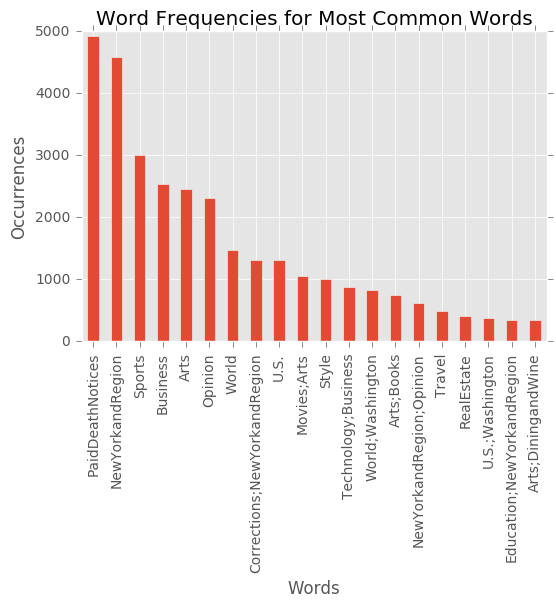

In [23]:
from collections import Counter
print(Counter(tagsC).most_common(100))
plotFreqDistAsBarChart(Counter(tagsC),20)

'/opt/nltk_data/nyt/data/1987'

25648


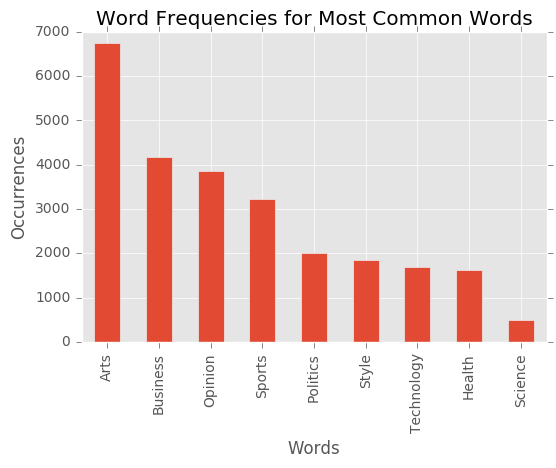

In [15]:
import tarfile,os
import sys
import gzip
from contextlib import closing
from xml.etree import ElementTree as etree

tagsC = []

for i in range(6):
    with tarfile.open('/opt/nltk_data/nyt/data/2007/0'+str(i+1)+'.tgz') as archive:
        for member in archive:
            if member.isreg() and member.name.endswith('.xml'): # regular xml file
                with closing(archive.extractfile(member)) as xmlfile:
                    root = etree.parse(xmlfile).getroot()
                    for meta in root.findall(".//*[@name='online_sections']"):
                        newTags = meta.get("content").replace(" ","")
                        
                        tags = []
                        for tag in newTags.split(";"):
                            # Whitelist
                            if tag in ["Arts", "Business", "Science", "Sports", "Technology", "Health", "Opinion", "Style"]:
                                tags.append(tag)
                                continue
                            # Map tags
                            if tag in ["Books","Theater","Movies"]:
                                tags.append("Arts")
                                continue
                            if tag in ["Automobile"]:
                                tags.append("Business")
                                continue
                            if tag in ["Washington"]:
                                tags.append("Politics")
                                continue
                            if tag in ["ThePublicEditor","Editors'Notes"]:
                                tags.append("Opinion")
                                continue
                            
                            
                        # Remove Double Tags
                        tags = list(set(tags))
                
                        # Remove Empty Tags
                        if len(tags) == 0 :
                            continue
                        for tag in tags : 
                            tagsC.extend([tag])
                        
#print(tagsC)


In [ ]:
print(len(tagsC))
plotFreqDistAsBarChart(Counter(tagsC),20)

Arts 6757
Opinion 3850
Sports 3216
Business 4164
Politics 2005
Style 1852
Technology 1679
Health 1630
Science 495


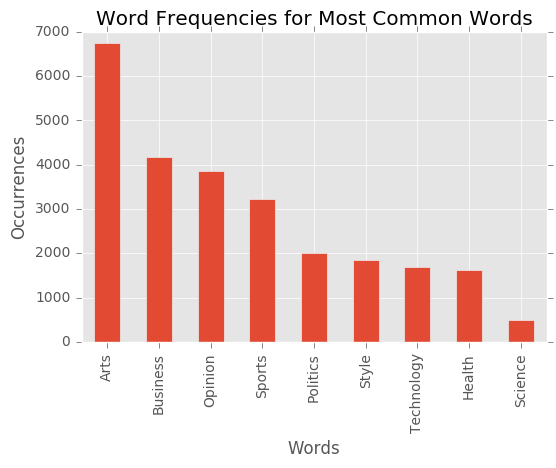

In [16]:
from collections import Counter
c = Counter(tagsC)
print("Arts", str(c["Arts"]))
print("Opinion", str(c["Opinion"]))
print("Sports", str(c["Sports"]))
print("Business", str(c["Business"]))
print("Politics", str(c["Politics"]))
print("Style", str(c["Style"]))
print("Technology", str(c["Technology"]))
print("Health", str(c["Health"]))
print("Science", str(c["Science"]))
c.most_common(50)

In [17]:
import tarfile,os
import sys
import gzip
from contextlib import closing
from xml.etree import ElementTree as etree

tagsC = []

for i in range(6):
    with tarfile.open('/opt/nltk_data/nyt/data/2007/0'+str(i+1)+'.tgz') as archive:
        for member in archive:
            if member.isreg() and member.name.endswith('.xml'): # regular xml file
                with closing(archive.extractfile(member)) as xmlfile:
                    root = etree.parse(xmlfile).getroot()
                    for meta in root.findall(".//*[@name='online_sections']"):
                        newTags = meta.get("content").replace(" ","")
                        
                        tags = []
                        for tag in newTags.split(";"):
                            # Whitelist
                            if tag in ["Arts", "Business", "Science", "Sports", "Technology", "Health", "Opinion", "Style"]:
                                tags.append(tag)
                                continue
                            # Map tags
                            if tag in ["Books","Theater","Movies"]:
                                tags.append("Arts")
                                continue
                            if tag in ["Automobile"]:
                                tags.append("Business")
                                continue
                            if tag in ["Washington"]:
                                tags.append("Politics")
                                continue
                            if tag in ["ThePublicEditor","Editors'Notes"]:
                                tags.append("Opinion")
                                continue
                            
                            
                        # Remove Double Tags
                        tags = list(set(tags))
                
                        # Remove Empty Tags
                        if len(tags) == 0 or len(tags) > 1 :
                            continue
                        tagsC.extend([';'.join(tags)])
                        
#print(tagsC)

19305


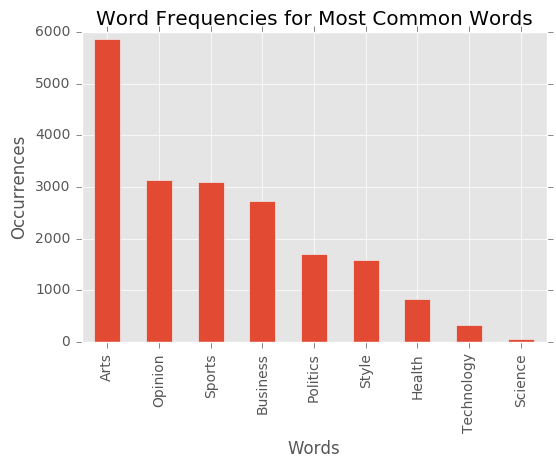

In [18]:
print(len(tagsC))
plotFreqDistAsBarChart(Counter(tagsC),20)

In [20]:
from collections import Counter
Counter(tagsC).most_common(50)

[('Arts', 5865),
 ('Opinion', 3142),
 ('Sports', 3086),
 ('Business', 2718),
 ('Politics', 1698),
 ('Style', 1578),
 ('Health', 835),
 ('Technology', 335),
 ('Science', 48)]

In [ ]:
for i in range(6):
    with tarfile.open('/opt/nltk_data/nyt/data/2007/0'+str(i+1)+'.tgz') as archive:
        for member in archive:
            if member.isreg() and member.name.endswith('.xml'): # regular xml file
                with closing(archive.extractfile(member)) as xmlfile:
                    root = etree.parse(xmlfile).getroot()
                    for meta in root.findall(".//*[@name='online_sections']"):
                        newTags = meta.get("content").replace(" ","")
                        
                        tags = []
                        for tag in newTags.split(";"):
                            # Whitelist
                            if tag in ["Arts", "Business", "Science", "Sports", "Technology", "Health", "Opinion", "Style"]:
                                tags.append(tag)
                                continue
                            # Map tags
                            if tag in ["Books","Theater","Movies"]:
                                tags.append("Arts")
                                continue
                            if tag in ["Automobile"]:
                                tags.append("Business")
                                continue
                            if tag in ["Washington"]:
                                tags.append("Politics")
                                continue
                            if tag in ["ThePublicEditor","Editors'Notes"]:
                                tags.append("Opinion")
                                continue
                            
                            
                        # Remove Double Tags
                        tags = list(set(tags))
                
                        # Remove Empty Tags
                        if len(tags) == 0 or len(tags) > 1 :
                            continue
                        tagsC.extend([';'.join(tags)])
                        
print(tagsC)
print(len(tagsC))